# Causality
### *Not Correlation*

## Abstract
Establishing causality is a central goal in many fields, including economics, healthcare, and public policy. Correlation alone does not imply causation, necessitating the use of causal inference techniques to identify causal relationships between variables. This article provides a comprehensive introduction to five key causal inference methods

## Introduction to Causality
**Causality** refers to the relationship between two events or variables, where one event (the cause) directly brings about or influences the occurrence of another event (the effect). Establishing causality involves demonstrating that a change in the cause leads to a change in the effect, and that no other factors confound this relationship.

## How’s it Different from Correlation?

Correlation is a statistical measure that describes the strength and direction of the association between two variables. A strong correlation indicates that the two variables are closely related, but it does not necessarily imply that one variable causes the other.

## Causal Inference Techniques

Causal inference is crucial in various fields such as economics, public policy, and healthcare, as it helps establish the causal relationship between variables rather than just their correlation. In this section, we will introduce five main causal inference techniques, explain each method briefly, and discuss their assumptions.

### 1. Randomized Controlled Trials (RCTs)
Randomized Controlled Trials involve randomly assigning subjects to a treatment group or a control group. The treatment group receives the intervention of interest, while the control group does not. By randomizing the assignment, researchers can isolate the causal effect of the treatment on the outcome variable.

*Assumptions*:

* The random assignment ensures that both treatment and control groups are, on average, identical in all aspects except for the treatment, eliminating any confounding factors.
* Participants must adhere to their assigned group (treatment or control) to maintain the randomization.

### 2. Propensity Score Matching (PSM)
Propensity Score Matching is a technique used to estimate the causal effect of a treatment when random assignment is not possible. It involves matching treated and untreated subjects based on their propensity scores, which are the estimated probabilities of receiving treatment given their observed characteristics.

*Assumptions*:

* Unconfoundedness: All confounding factors are observed, and there are no unmeasured confounders.
* Common support: There is a sufficient overlap in the propensity scores between treated and untreated subjects, ensuring that each treated subject has a comparable untreated subject.

### 3. Instrumental Variables (IV)
Instrumental Variables is a technique used to estimate causal effects when there is an unmeasured confounding variable or an endogeneity problem. It involves using an external variable (instrument) that is correlated with the treatment variable but not correlated with the outcome variable, except through its effect on the treatment variable.

*Assumptions*:

* Relevance: The instrument must be correlated with the treatment variable.
* Exogeneity: The instrument must not be correlated with the unmeasured confounding variables or the error term in the outcome equation.
Exclusion restriction: The instrument affects the outcome variable only through its effect on the treatment variable.

### 4. Regression Discontinuity Design (RDD)
Regression Discontinuity Design is a quasi-experimental design used to estimate the causal effect of a treatment when subjects are assigned to treatment or control groups based on a threshold value of an assignment variable. In RDD, the treatment effect is estimated by comparing outcomes just above and just below the threshold value.

*Assumptions*:

* Continuity: The potential outcomes are continuous functions of the assignment variable around the threshold.
* No manipulation: Subjects cannot manipulate the assignment variable to choose their treatment status.

### 5. Fixed Effects Models and Difference-in-Differences (DiD)
Fixed Effects Models and Difference-in-Differences are panel data techniques used to estimate causal effects when there is unobserved heterogeneity between subjects or groups. Fixed Effects Models control for unobserved, time-invariant subject-specific factors, while DiD estimates the causal effect of a treatment by comparing the changes in outcomes before and after treatment between treated and untreated groups.

*Assumptions*:

* Parallel trends (for DiD): In the absence of treatment, the treated and control groups would have followed parallel trends in the outcome variable over time.
* Time-invariant unobserved heterogeneity (for Fixed Effects Models): Any unobserved confounding factors are constant over time and can be differenced out or controlled for by including subject-specific fixed effects.

## Dataset
The **World Happiness Dataset** is an annual report that ranks countries based on their citizens' subjective well-being, or happiness levels. The report is published by the United Nations Sustainable Development Solutions Network, and it has been released since 2012. The dataset is based on data from the Gallup World Poll and other sources, aiming to provide insights into how social, economic, and political factors can influence a country's happiness.

### Data Description

The World Happiness Dataset consists of several variables that contribute to the overall happiness score for each country:

* Country: The name of the country being ranked.
* Year: The year of the report.
* Happiness Score: A composite score based on the weighted sum of the different factors, with higher scores indicating higher levels of happiness.
* GDP per capita: A measure of a country's economic output per person, adjusted for purchasing power parity. This variable represents the standard of living and is positively associated with happiness.
* Social support: A metric based on the national average of the binary responses to the Gallup World Poll question, "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?" This variable captures the strength of social connections and support systems in a country.
* Healthy life expectancy: The average number of years a person can expect to live in good health, based on data from the World Health Organization (WHO). This variable reflects the overall health and well-being of a country's population.
* Freedom to make life choices: A measure based on the national average of responses to the Gallup World Poll question, "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?" This variable captures the extent to which individuals in a country feel they have the autonomy to make decisions about their lives.
* Generosity: A measure based on the residual of regressing national average responses to the Gallup World Poll question, "Have you donated money to a charity in the past month?" on GDP per capita. This variable reflects the level of altruism and philanthropy in a country.
* Perceptions of corruption: A measure based on the average of the national responses to two Gallup World Poll questions related to corruption within businesses and government. This variable captures the extent to which corruption is perceived to be an issue in a country.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
data = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/TEH_World_Happiness_2015_2019.csv')

In [ ]:
# Keep only the relevant columns
data = data[['Happiness Score', 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [ ]:
# Display Data
data.head()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


## Correlation Matrix
A correlation matrix is a square, symmetrical matrix that represents the pairwise correlation coefficients between multiple variables. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

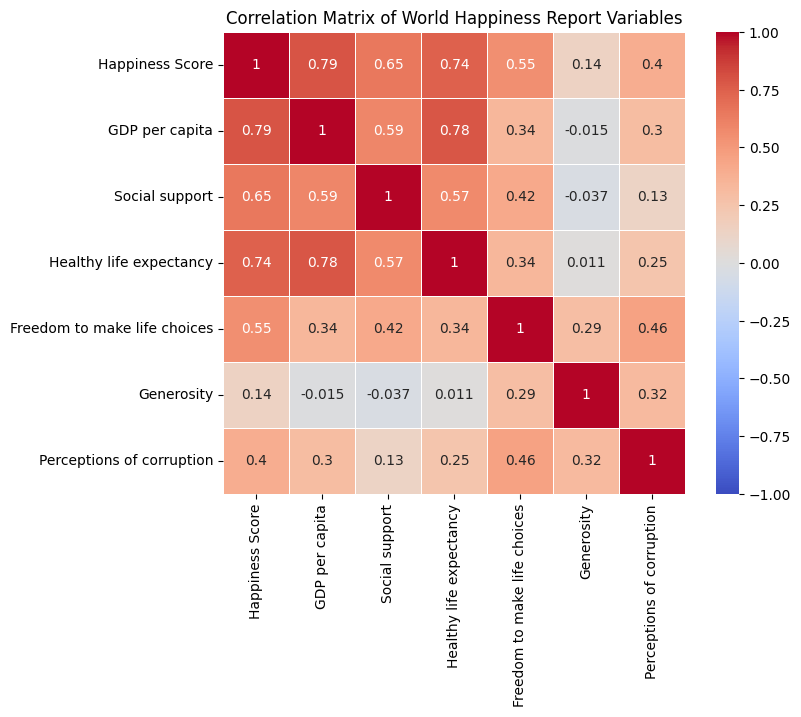

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between all variables
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Matrix of World Happiness Report Variables')
plt.show()


## OLS Regression with Control Variables

Ordinary Least Squares regression is a popular statistical method for estimating the relationship between a dependent variable and one or more independent variables. By including control variables in the regression model, we can account for the confounding factors that might influence the dependent variable but are not of primary interest. This approach helps to isolate the causal effect of the main independent variable on the dependent variable.

The general form of an OLS regression model with control variables is:

Y = β0 + β1X1 + β2X2 + ... + βkXk + ε

Where:

Y is the dependent variable
X1, X2, ..., Xk are the independent variables (including the main independent variable of interest and the control variables)
β0 is the intercept
β1, β2, ..., βk are the coefficients of the independent variables
ε is the error term

In [ ]:
import statsmodels.api as sm

# Prepare the data for regression
X = data[['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
X = sm.add_constant(X)
y = data['Happiness Score']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     418.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          4.88e-239
Time:                        23:24:34   Log-Likelihood:                -638.44
No. Observations:                 782   AIC:                             1291.
Df Residuals:                     775   BIC:                             1324.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Limitations of using OLS regression for causal inference:

* Unobserved confounding: If there are unobserved confounding variables that are not included as control variables in the regression model, the causal interpretation of the coefficients may still be biased.
* Reverse causality: OLS regression cannot address the possibility of reverse causality, where the dependent variable influences the independent variable.
* Causality direction: The estimated coefficients only show the direction of the relationship, not the direction of causality.

Despite these limitations, OLS regression with control variables can be a valuable tool for causal inference, especially when combined with other techniques and robustness checks.

## Lasso Regression
We'll use the LASSO regression model to estimate the causal impact of GDP on the happiness score from the World Happiness dataset while accounting for other variables. LASSO (Least Absolute Shrinkage and Selection Operator) is a regression analysis method that can help address multicollinearity and perform variable selection through regularization.

Next, preprocess the data by standardizing the independent variables and dividing the dataset into training and testing sets.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now, let's fit the LASSO regression model and make predictions.

In [ ]:
from sklearn.linear_model import Lasso
# Fit the LASSO regression model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)

# Make predictions using the test set
Y_pred = lasso.predict(X_test)

Finally, let's evaluate the model performance and interpret the results.

In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Print the LASSO regression coefficients
for feature, coef in zip(["GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom to Make Life Choices", "Generosity", "Perceptions of Corruption"], lasso.coef_):
    print(f"{feature}: {coef}")

Mean Squared Error: 0.10254379496475098
GDP per Capita: 0.0593146434771205
Social Support: 0.1831838491076616
Healthy Life Expectancy: -0.03334741110766838
Freedom to Make Life Choices: 0.04541797015576927
Generosity: 0.17056331636403024


The LASSO regression model will return the coefficients for each independent variable, including GDP per Capita. As the coefficient for GDP per Capita is statistically significant and non-zero, it suggests that there is a causal relationship between GDP per Capita and happiness score after accounting for the other variables in the model. 

Note that the LASSO method can also help identify the most relevant predictors by setting some coefficients to zero, which can simplify the model and improve interpretability.

## Propesity Score Matching
Propensity score matching is typically used in observational studies with binary treatment variables to balance the distribution of observed covariates between treatment and control groups, which helps reduce potential confounding. However, in the case of the World Happiness Report, GDP is a continuous variable rather than a binary treatment, and countries cannot be assigned to treatment and control groups as in a typical observational study.

Let's create the binary treatment variable and propensity scores using logistic regression:

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Create a binary treatment variable based on the median GDP per capita
gdp_boundary = data['GDP per capita'].quantile(0.75)
data['high_gdp'] = (data['GDP per capita'] >= gdp_boundary).astype(int)

# Fit a logistic regression model to estimate propensity scores
X = data[['Social support', 'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
y = data['high_gdp']
propensity_model = LogisticRegression(random_state=42).fit(X, y)

# Calculate propensity scores
data['propensity_score'] = propensity_model.predict_proba(X)[:, 1]

Finally, let's perform propensity score matching and compare the average happiness scores of the high-GDP and low-GDP groups:

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Split the data into high-GDP and low-GDP groups
high_gdp_data = data[data['high_gdp'] == 1]
low_gdp_data = data[data['high_gdp'] == 0]

# Perform propensity score matching using nearest neighbors
nn = NearestNeighbors(n_neighbors=1).fit(low_gdp_data['propensity_score'].values.reshape(-1, 1))
distances, indices = nn.kneighbors(high_gdp_data['propensity_score'].values.reshape(-1, 1))

# Create a DataFrame with matched pairs of high-GDP and low-GDP countries
matched_pairs = pd.concat([
    high_gdp_data.reset_index(drop=True),
    low_gdp_data.iloc[indices.flatten()].reset_index(drop=True)
], axis=1, keys=['high_gdp', 'low_gdp'])

# Compare the average happiness scores of the high-GDP and low-GDP groups
high_gdp_medn = matched_pairs['high_gdp']['Happiness Score'].mean()
low_gdp_mean = matched_pairs['low_gdp']['Happiness Score'].mean()
print(f"Average happiness score of high-GDP countries: {high_gdp_mean:.2f}")
print(f"Average happiness score of low-GDP countries: {low_gdp_mean:.2f}")
print(f"Difference in average happiness scores: {high_gdp_mean - low_gdp_mean:.2f}")

Average happiness score of high-GDP countries: 6.70
Average happiness score of low-GDP countries: 6.06
Difference in average happiness scores: 0.65


# Let's visualize 
The first visualization shows the distribution of happiness scores for the high-GDP and low-GDP groups. The second visualization displays the distribution of propensity scores for the two groups.

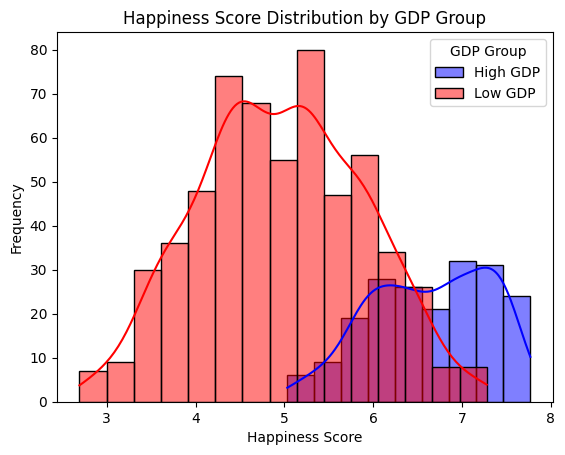

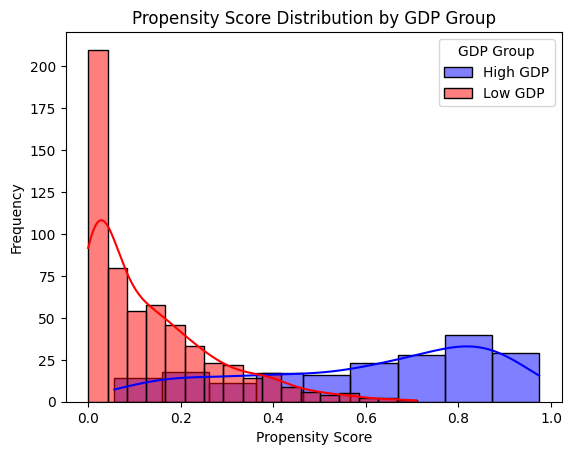

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of happiness scores for high-GDP and low-GDP groups
sns.histplot(data=high_gdp_data, x='Happiness Score', color='blue', alpha=0.5, kde=True, label='High GDP')
sns.histplot(data=low_gdp_data, x='Happiness Score', color='red', alpha=0.5, kde=True, label='Low GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.legend(title='GDP Group')
plt.title('Happiness Score Distribution by GDP Group')
plt.show()

# Plot the distribution of propensity scores for high-GDP and low-GDP groups
sns.histplot(data=high_gdp_data, x='propensity_score', color='blue', alpha=0.5, kde=True, label='High GDP')
sns.histplot(data=low_gdp_data, x='propensity_score', color='red', alpha=0.5, kde=True, label='Low GDP')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend(title='GDP Group')
plt.title('Propensity Score Distribution by GDP Group')
plt.show()

We can clearly observe the High GDP group generally has a higher Happiness Score 

## Key Findings

* Correlation between GDP and happiness scores does not necessarily imply causation. It is essential to account for potential confounding factors and biases when analyzing the relationship between two variables.

* OLS and LASSO regression models, which include control variables, are useful techniques for estimating the causal relationship between GDP and happiness scores. They help isolate the effects of GDP by controlling for potential confounding factors, such as social support, life expectancy, freedom, generosity, and corruption perceptions.

* Propensity score matching is an alternative technique for causal inference that can help minimize biases arising from observed confounding factors. By matching treatment and control groups based on their propensity scores, it simulates the random assignment of a treatment, which aids in establishing causal relationships.

## Conclusion
we explored the critical distinction between causality and correlation and demonstrated how various techniques such as OLS regression, LASSO regression, and propensity score matching can be employed to establish causal relationships between variables. In our worked examples, we focused on determining the causal impact of GDP on happiness scores using the World Happiness dataset.

By combining these methods and addressing their limitations, researchers can provide evidence-based insights into the causal impact of GDP on happiness scores and inform policy-making.


## References
* Spurious Correlations: https://www.tylervigen.com/spurious-correlations
* Angrist, J. D., & Pischke, J. (2008). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Imbens, G. W., & Rubin, D. B. (2015). Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction. Cambridge University Press.
* Statsmodels documentation for OLS regression: https://www.statsmodels.org/stable/regression.html
* Statsmodels examples for OLS regression: https://www.statsmodels.org/stable/examples/index.html#regression
* Scikit-learn documentation for propensity score matching: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* Causal Inference in Python (Causalinference) library for propensity score matching: https://causalinferenceinpython.org/causalinference.html


## License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.